MSM from "primitive clustering" along rama-plot
====

In [1]:
import pyemma
pyemma.__version__

'2.1.1'

In [2]:
import os
%pylab inline
matplotlib.rcParams.update({'font.size': 12})

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import msmbuilder
from msmbuilder.msm.ratematrix import ContinuousTimeMSM
import scipy
from msmtools.analysis.dense.decomposition import eigenvectors, eigenvalues
import operator

Read in the dtrajs
------

In [4]:
indir = '/data/isilon/rudzinski/cluster_tmp/ALA7/ALA7_hybrid_AMBER_Go/wDB-HP_inter/Find_Tfold/NC_CA/2016_10_11/epsNC-11/epsNC-11_epsdb-0.00epsNC_epshp-0.25epsNC/T-275/'

traj_dir_base = 'run_from_Qhel-'
Qhel_val = ['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']

dtraj_rama_2 = []
dtraj_rama_3 = []
dtraj_rama_4 = []
dtraj_rama_5 = []
dtraj_rama_6 = []
for i in range (len(Qhel_val)):
    for j in range(2):
        traj_dir = indir+traj_dir_base+Qhel_val[i]+'/run'+str(j+1)+'/'
        dtraj_rama_2.append( np.genfromtxt(traj_dir+'rama_ALA2.xvg')[:,0:2] )
        dtraj_rama_3.append( np.genfromtxt(traj_dir+'rama_ALA3.xvg')[:,0:2] )
        dtraj_rama_4.append( np.genfromtxt(traj_dir+'rama_ALA4.xvg')[:,0:2] )
        dtraj_rama_5.append( np.genfromtxt(traj_dir+'rama_ALA5.xvg')[:,0:2] )
        dtraj_rama_6.append( np.genfromtxt(traj_dir+'rama_ALA6.xvg')[:,0:2] )

In [5]:
for i in range( len(dtraj_rama_2) ):
    dtraj_rama_2[i][np.where(dtraj_rama_2[i][:,1] < -125)[0],1] += 360  
    dtraj_rama_3[i][np.where(dtraj_rama_3[i][:,1] < -125)[0],1] += 360
    dtraj_rama_4[i][np.where(dtraj_rama_4[i][:,1] < -125)[0],1] += 360
    dtraj_rama_5[i][np.where(dtraj_rama_5[i][:,1] < -125)[0],1] += 360
    dtraj_rama_6[i][np.where(dtraj_rama_6[i][:,1] < -125)[0],1] += 360

In [6]:
dtraj_phi_2 = []
dtraj_phi_3 = []
dtraj_phi_4 = []
dtraj_phi_5 = []
dtraj_phi_6 = []
for i in range( len(dtraj_rama_2) ):
    dtraj_phi_2.append(dtraj_rama_2[i][:,1])
    dtraj_phi_3.append(dtraj_rama_3[i][:,1])
    dtraj_phi_4.append(dtraj_rama_4[i][:,1])
    dtraj_phi_5.append(dtraj_rama_5[i][:,1])
    dtraj_phi_6.append(dtraj_rama_6[i][:,1])

**simple clustering along psi only for discretization**

In [7]:
n_clusters = 2     # number of k-means clusters

In [8]:
clustering_rama_2 = coor.cluster_kmeans(dtraj_phi_2,k=n_clusters,max_iter=100, tolerance=1e-12, fixed_seed=True)
clustering_rama_3 = coor.cluster_kmeans(dtraj_phi_3,k=n_clusters,max_iter=100, tolerance=1e-12, fixed_seed=True)
clustering_rama_4 = coor.cluster_kmeans(dtraj_phi_4,k=n_clusters,max_iter=100, tolerance=1e-12, fixed_seed=True)
clustering_rama_5 = coor.cluster_kmeans(dtraj_phi_5,k=n_clusters,max_iter=100, tolerance=1e-12, fixed_seed=True)
clustering_rama_6 = coor.cluster_kmeans(dtraj_phi_6,k=n_clusters,max_iter=100, tolerance=1e-12, fixed_seed=True)

23-11-16 15:48:51 pyemma.coordinates.clustering.kmeans.KmeansClustering[0] INFO     Cluster centers converged after 6 steps.
23-11-16 15:48:52 pyemma.coordinates.clustering.kmeans.KmeansClustering[1] INFO     Cluster centers converged after 6 steps.
23-11-16 15:48:53 pyemma.coordinates.clustering.kmeans.KmeansClustering[2] INFO     Cluster centers converged after 5 steps.
23-11-16 15:48:54 pyemma.coordinates.clustering.kmeans.KmeansClustering[3] INFO     Cluster centers converged after 5 steps.
23-11-16 15:48:55 pyemma.coordinates.clustering.kmeans.KmeansClustering[4] INFO     Cluster centers converged after 7 steps.


[ 147.73942566    3.37630725]
[   2.27605796  147.42706299]
[ 147.40486145    1.67481756]
[ 147.40907288    3.31631422]
[ 146.10786438    8.44609833]


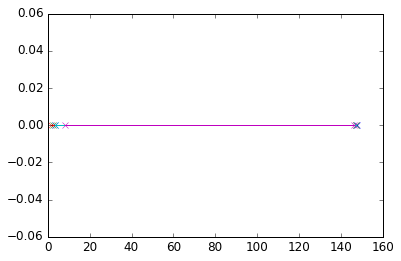

In [9]:
cc_rama_2 = clustering_rama_2.clustercenters[:,0]
cc_rama_3 = clustering_rama_3.clustercenters[:,0]
cc_rama_4 = clustering_rama_4.clustercenters[:,0]
cc_rama_5 = clustering_rama_5.clustercenters[:,0]
cc_rama_6 = clustering_rama_6.clustercenters[:,0]
plt.plot(cc_rama_2,np.zeros(len(cc_rama_2)),marker='x')
plt.plot(cc_rama_3,np.zeros(len(cc_rama_3)),marker='x')
plt.plot(cc_rama_4,np.zeros(len(cc_rama_4)),marker='x')
plt.plot(cc_rama_5,np.zeros(len(cc_rama_5)),marker='x')
plt.plot(cc_rama_6,np.zeros(len(cc_rama_6)),marker='x')
print cc_rama_2
print cc_rama_3
print cc_rama_4
print cc_rama_5
print cc_rama_6

In [10]:
dtrajs_rama_2 = clustering_rama_2.dtrajs
dtrajs_rama_3 = clustering_rama_3.dtrajs
dtrajs_rama_4 = clustering_rama_4.dtrajs
dtrajs_rama_5 = clustering_rama_5.dtrajs
dtrajs_rama_6 = clustering_rama_6.dtrajs

In [11]:
for traj in range( len(dtraj_rama_2) ):
    if ( dtrajs_rama_2[traj][np.where(dtraj_phi_2[traj] < 0)[0][0]] != 0 ):
        dtrajs_rama_2[traj][np.where(dtrajs_rama_2[traj] == 0)[0]] -= 1
        dtrajs_rama_2[traj][np.where(dtrajs_rama_2[traj] == 1)[0]] -= 1
        dtrajs_rama_2[traj][np.where(dtrajs_rama_2[traj] == -1)[0]] += 2
    if ( dtrajs_rama_3[traj][np.where(dtraj_phi_3[traj] < 0)[0][0]] != 0 ):
        dtrajs_rama_3[traj][np.where(dtrajs_rama_3[traj] == 0)[0]] -= 1
        dtrajs_rama_3[traj][np.where(dtrajs_rama_3[traj] == 1)[0]] -= 1
        dtrajs_rama_3[traj][np.where(dtrajs_rama_3[traj] == -1)[0]] += 2
    if ( dtrajs_rama_4[traj][np.where(dtraj_phi_4[traj] < 0)[0][0]] != 0 ):
        dtrajs_rama_4[traj][np.where(dtrajs_rama_4[traj] == 0)[0]] -= 1
        dtrajs_rama_4[traj][np.where(dtrajs_rama_4[traj] == 1)[0]] -= 1
        dtrajs_rama_4[traj][np.where(dtrajs_rama_4[traj] == -1)[0]] += 2
    if ( dtrajs_rama_5[traj][np.where(dtraj_phi_5[traj] < 0)[0][0]] != 0 ):
        dtrajs_rama_5[traj][np.where(dtrajs_rama_5[traj] == 0)[0]] -= 1
        dtrajs_rama_5[traj][np.where(dtrajs_rama_5[traj] == 1)[0]] -= 1
        dtrajs_rama_5[traj][np.where(dtrajs_rama_5[traj] == -1)[0]] += 2
    if ( dtrajs_rama_6[traj][np.where(dtraj_phi_6[traj] < 0)[0][0]] != 0 ):
        dtrajs_rama_6[traj][np.where(dtrajs_rama_6[traj] == 0)[0]] -= 1
        dtrajs_rama_6[traj][np.where(dtrajs_rama_6[traj] == 1)[0]] -= 1
        dtrajs_rama_6[traj][np.where(dtrajs_rama_6[traj] == -1)[0]] += 2

(-125, 250)

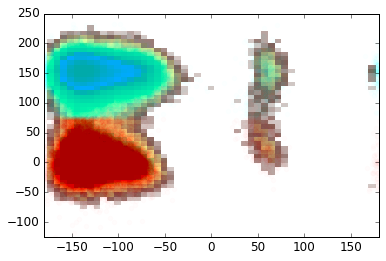

In [12]:
H_rama, phi_edges, psi_edges = np.histogram2d(dtraj_rama_2[0][:,0], dtraj_rama_2[0][:,1], bins=50, range=None, normed=None, weights=None )
phi_bins = 0.5*(phi_edges[1:] + phi_edges[:-1])
psi_bins = 0.5*(psi_edges[1:] + psi_edges[:-1]) 

H_rama = np.rot90(H_rama)
H_rama = np.flipud(H_rama)
FE_H = -np.ma.log(H_rama)
FE_H -= np.min(FE_H)
FE_max = np.max(FE_H)
FE_H = FE_H.filled()
plt.pcolormesh(phi_bins, psi_bins, FE_H, cmap='terrain', vmax=FE_max)
plt.scatter(dtraj_rama_2[0][np.where(dtrajs_rama_2[0]==0),0],dtraj_rama_2[0][np.where(dtrajs_rama_2[0]==0),1],color='red',alpha=0.01)
plt.scatter(dtraj_rama_2[0][np.where(dtrajs_rama_2[0]==1),0],dtraj_rama_2[0][np.where(dtrajs_rama_2[0]==1),1],color='cyan',alpha=0.01)
plt.xlim([-180,180])
plt.ylim([-125,250])

(-125, 250)

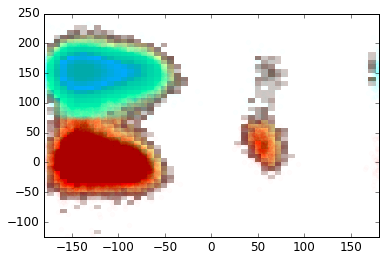

In [13]:
H_rama, phi_edges, psi_edges = np.histogram2d(dtraj_rama_3[0][:,0], dtraj_rama_3[0][:,1], bins=50, range=None, normed=None, weights=None )
phi_bins = 0.5*(phi_edges[1:] + phi_edges[:-1])
psi_bins = 0.5*(psi_edges[1:] + psi_edges[:-1]) 

H_rama = np.rot90(H_rama)
H_rama = np.flipud(H_rama)
FE_H = -np.ma.log(H_rama)
FE_H -= np.min(FE_H)
FE_max = np.max(FE_H)
FE_H = FE_H.filled()
plt.pcolormesh(phi_bins, psi_bins, FE_H, cmap='terrain', vmax=FE_max)     
plt.scatter(dtraj_rama_3[0][np.where(dtrajs_rama_3[0]==0),0],dtraj_rama_3[0][np.where(dtrajs_rama_3[0]==0),1],color='red',alpha=0.01)
plt.scatter(dtraj_rama_3[0][np.where(dtrajs_rama_3[0]==1),0],dtraj_rama_3[0][np.where(dtrajs_rama_3[0]==1),1],color='cyan',alpha=0.01)
plt.xlim([-180,180])
plt.ylim([-125,250])

(-125, 250)

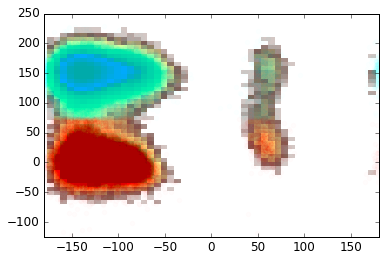

In [14]:
H_rama, phi_edges, psi_edges = np.histogram2d(dtraj_rama_4[0][:,0], dtraj_rama_4[0][:,1], bins=50, range=None, normed=None, weights=None )
phi_bins = 0.5*(phi_edges[1:] + phi_edges[:-1])
psi_bins = 0.5*(psi_edges[1:] + psi_edges[:-1]) 

H_rama = np.rot90(H_rama)
H_rama = np.flipud(H_rama)
FE_H = -np.ma.log(H_rama)
FE_H -= np.min(FE_H)
FE_max = np.max(FE_H)
FE_H = FE_H.filled()
plt.pcolormesh(phi_bins, psi_bins, FE_H, cmap='terrain', vmax=FE_max)      
plt.scatter(dtraj_rama_4[0][np.where(dtrajs_rama_4[0]==0),0],dtraj_rama_4[0][np.where(dtrajs_rama_4[0]==0),1],color='red',alpha=0.01)
plt.scatter(dtraj_rama_4[0][np.where(dtrajs_rama_4[0]==1),0],dtraj_rama_4[0][np.where(dtrajs_rama_4[0]==1),1],color='cyan',alpha=0.01)
plt.xlim([-180,180])
plt.ylim([-125,250])

(-125, 250)

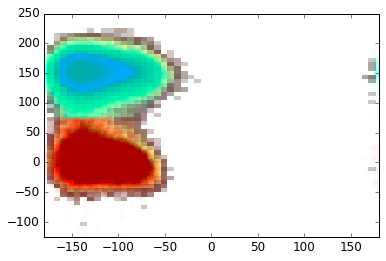

In [15]:
H_rama, phi_edges, psi_edges = np.histogram2d(dtraj_rama_5[0][:,0], dtraj_rama_5[0][:,1], bins=50, range=None, normed=None, weights=None )
phi_bins = 0.5*(phi_edges[1:] + phi_edges[:-1])
psi_bins = 0.5*(psi_edges[1:] + psi_edges[:-1]) 

H_rama = np.rot90(H_rama)
H_rama = np.flipud(H_rama)
FE_H = -np.ma.log(H_rama)
FE_H -= np.min(FE_H)
FE_max = np.max(FE_H)
FE_H = FE_H.filled()
plt.pcolormesh(phi_bins, psi_bins, FE_H, cmap='terrain', vmax=FE_max) 
plt.scatter(dtraj_rama_5[0][np.where(dtrajs_rama_5[0]==0),0],dtraj_rama_5[0][np.where(dtrajs_rama_5[0]==0),1],color='red',alpha=0.01)
plt.scatter(dtraj_rama_5[0][np.where(dtrajs_rama_5[0]==1),0],dtraj_rama_5[0][np.where(dtrajs_rama_5[0]==1),1],color='cyan',alpha=0.01)
plt.xlim([-180,180])
plt.ylim([-125,250])

(-125, 250)

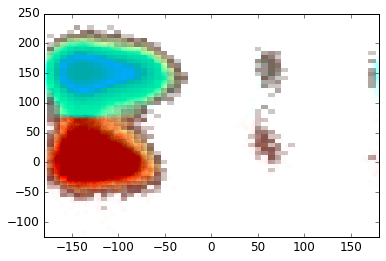

In [16]:
H_rama, phi_edges, psi_edges = np.histogram2d(dtraj_rama_6[0][:,0], dtraj_rama_6[0][:,1], bins=50, range=None, normed=None, weights=None )
phi_bins = 0.5*(phi_edges[1:] + phi_edges[:-1])
psi_bins = 0.5*(psi_edges[1:] + psi_edges[:-1]) 

H_rama = np.rot90(H_rama)
H_rama = np.flipud(H_rama)
FE_H = -np.ma.log(H_rama)
FE_H -= np.min(FE_H)
FE_max = np.max(FE_H)
FE_H = FE_H.filled()
plt.pcolormesh(phi_bins, psi_bins, FE_H, cmap='terrain', vmax=FE_max)
plt.scatter(dtraj_rama_6[0][np.where(dtrajs_rama_6[0]==0),0],dtraj_rama_6[0][np.where(dtrajs_rama_6[0]==0),1],color='red',alpha=0.01)
plt.scatter(dtraj_rama_6[0][np.where(dtrajs_rama_6[0]==1),0],dtraj_rama_6[0][np.where(dtrajs_rama_6[0]==1),1],color='cyan',alpha=0.01)
plt.xlim([-180,180])
plt.ylim([-125,250])

In [17]:
dtrajs = []
for i in range( len(dtraj_rama_2) ):
    dtrajs.append( np.vstack( (dtrajs_rama_2[i], dtrajs_rama_3[i], dtrajs_rama_4[i], dtrajs_rama_5[i], dtrajs_rama_6[i]) ).T )
    dtrajs[i].astype('int64')

In [18]:
dtrajs[0].shape

(200001, 5)

In [19]:
# we need a single dimensional identifier of the microstate, can we cluster to automize?
n_clusters = 2**5
clustering = coor.cluster_regspace(dtrajs,max_centers=n_clusters,dmin=0.5)

In [20]:
dtrajs_1D = clustering.dtrajs

In [21]:
lags = np.linspace(1,100,101,dtype='int')
its = msm.timescales_msm(dtrajs_1D, lags=lags, nsamples=50, nits=n_clusters)

23-11-16 15:49:31 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[6] WARNING  Changed user setting nits to the number of available timescales nits=31


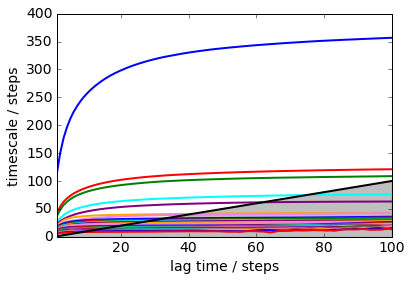

In [22]:
matplotlib.rcParams.update({'font.size': 14})
mplt.plot_implied_timescales(its, ylog=False, units='steps', linewidth=2)
#xlim(0, 100); ylim(0, 300);

In [23]:
tau = 50
nts = n_clusters
Cmat = pyemma.msm.estimation.count_matrix(dtrajs_1D, tau, sliding=True, sparse_return=False)
lcc = pyemma.msm.estimation.largest_connected_set(Cmat, directed=True)
Cmat = pyemma.msm.estimation.largest_connected_submatrix(Cmat, directed=True, lcc=lcc)
Tmle = pyemma.msm.estimation.transition_matrix(Cmat, reversible=True)

In [24]:
mle = pyemma.msm.markov_model(Tmle)
evals_mle = mle.eigenvalues(k=n_clusters)
evecs_mle = mle.eigenvectors_left(k=n_clusters)

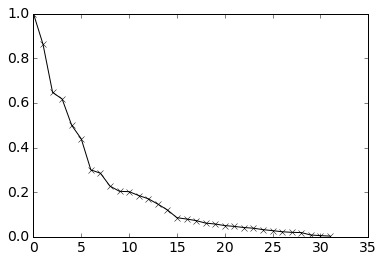

In [25]:
plt.plot(evals_mle,'k',marker='x')

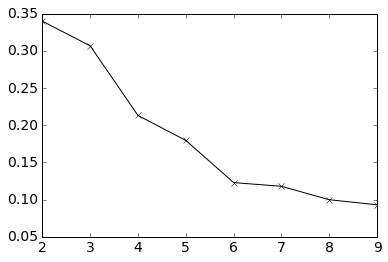

In [26]:
ts = -tau/np.log(evals_mle[1:10])
rts = ts[1:]/ts[0]
plt.plot(np.arange(2,len(rts)+2),rts,'k',marker='x')

In [27]:
cc = clustering.clustercenters[:]
cc

array([[ 1.,  1.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  0.,  1.],
       [ 1.,  1.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  1.],
       [ 0.,  1.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  1.],
       [ 1.,  0.,  1.,  1.,  0.],
       [ 1.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  1.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.],
       [ 0.,  1.,  1.,  0.,  1.],
       [ 0.,  1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  

In [28]:
cc_labels = []
for i in range(len(cc)):
    cc_labels.append([])
    cc_labels[i] = ''
    for j in range(len(cc[0])):
        if (cc[i,j]==0):
            cc_labels[i] += 'a'
        else:
            cc_labels[i] += 'b'
cc_labels = np.array(cc_labels)

In [29]:
# calculate the number of adjacent and almost adjacent alphas for each state
cc_nn = np.zeros(len(cc))
cc_nnn = np.zeros(len(cc))
for i in range(len(cc)):
    if ( np.where(cc[i]==1)[0].shape[0] == 2):
        d1 = np.where(cc[i]==1)[0][1] - np.where(cc[i]==1)[0][0]
        if (d1==1):
            cc_nn[i] += 1
        elif (d1==2):
            cc_nnn[i] += 1
    elif ( np.where(cc[i]==1)[0].shape[0] == 3):
        d1 = np.where(cc[i]==1)[0][1] - np.where(cc[i]==1)[0][0]
        d2 = np.where(cc[i]==1)[0][2] - np.where(cc[i]==1)[0][1]
        if (d1==1):
            cc_nn[i] += 1
        elif (d1==2):
            cc_nnn[i] += 1
        if (d2==1):
            cc_nn[i] += 1
        elif (d2==2):
            cc_nnn[i] += 1
    elif ( np.where(cc[i]==1)[0].shape[0] == 4):
        d1 = np.where(cc[i]==1)[0][1] - np.where(cc[i]==1)[0][0]
        d2 = np.where(cc[i]==1)[0][2] - np.where(cc[i]==1)[0][1]
        d3 = np.where(cc[i]==1)[0][3] - np.where(cc[i]==1)[0][2]
        if (d1==1):
            cc_nn[i] += 1
        elif (d1==2):
            cc_nnn[i] += 1
        if (d2==1):
            cc_nn[i] += 1
        elif (d2==2):
            cc_nnn[i] += 1
        if (d3==1):
            cc_nn[i] += 1
        elif (d3==2):
            cc_nnn[i] += 1

In [30]:
cc_stack = []
for i in range(len(cc)):
    cc_stack.append(np.hstack((np.sum(cc,axis=1)[i],cc_nn[i],cc_nnn[i],cc[i],lcc[i])))

In [31]:
sorted_list = sorted(cc_stack, key=operator.itemgetter(0,1,2,5,4,6,3))

In [32]:
cc_sorted = np.array(sorted_list)[:,3:8]
cc_sorted = cc_sorted.tolist()
for i in range(len(cc)):
    cc_sorted[i] = map(int,cc_sorted[i])
cc_sorted

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [1, 0, 0, 0, 1],
 [1, 0, 0, 1, 0],
 [0, 1, 0, 0, 1],
 [0, 1, 0, 1, 0],
 [0, 0, 1, 0, 1],
 [1, 0, 1, 0, 0],
 [0, 0, 0, 1, 1],
 [1, 1, 0, 0, 0],
 [0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0],
 [1, 0, 1, 0, 1],
 [1, 0, 0, 1, 1],
 [1, 1, 0, 0, 1],
 [0, 1, 0, 1, 1],
 [1, 1, 0, 1, 0],
 [1, 0, 1, 1, 0],
 [0, 1, 1, 0, 1],
 [0, 0, 1, 1, 1],
 [1, 1, 1, 0, 0],
 [0, 1, 1, 1, 0],
 [1, 1, 0, 1, 1],
 [1, 0, 1, 1, 1],
 [1, 1, 1, 0, 1],
 [0, 1, 1, 1, 1],
 [1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1]]

In [33]:
lcc_sorted = np.array(sorted_list)[:,8]
lcc_sorted = lcc_sorted.tolist()
lcc_sorted = map(int, lcc_sorted)
lcc_sorted

[23,
 21,
 18,
 30,
 28,
 29,
 17,
 13,
 31,
 16,
 27,
 20,
 22,
 19,
 24,
 26,
 9,
 7,
 15,
 14,
 3,
 12,
 25,
 11,
 1,
 10,
 5,
 6,
 4,
 8,
 0,
 2]

In [34]:
# lcc_sorted is actually the back-map, we want the forward mapping
lcc_sorted_map = []
for i in range(cc.shape[0]):
    lcc_sorted_map.append( np.where(lcc_sorted==lcc[i])[0][0] )
lcc_sorted_map = np.array(lcc_sorted_map)
lcc_sorted_map

array([30, 24, 31, 20, 28, 26, 27, 17, 29, 16, 25, 23, 21,  7, 19, 18,  9,
        6,  2, 13, 11,  1, 12,  0, 14, 22, 15, 10,  4,  5,  3,  8])

In [35]:
lcc

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

array([[ 1.,  1.,  1.,  1.,  1.]], dtype=float32)

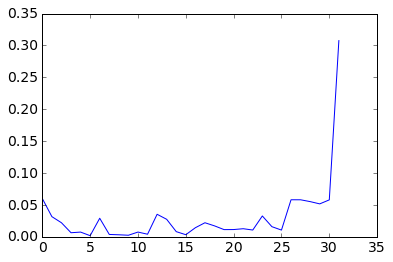

In [36]:
#plt.plot(evecs_mle[0])
plt.plot(evecs_mle[0][lcc_sorted])
max_ind = np.where(evecs_mle[0]==max(evecs_mle[0]))[0]
cc[max_ind]

[[ 1.  1.  1.  1.  1.]]
[[ 0.  0.  0.  0.  0.]]


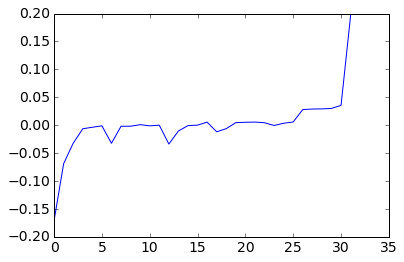

In [37]:
plt.plot(evecs_mle[1][lcc_sorted])
max_ind = np.where(evecs_mle[1]==max(evecs_mle[1]))[0]
print cc[max_ind]
min_ind = np.where(evecs_mle[1]==min(evecs_mle[1]))[0]
print cc[min_ind]

[[ 1.  1.  0.  0.  0.]]
[[ 0.  0.  0.  1.  1.]]
[1, 0, 0, 0, 1]


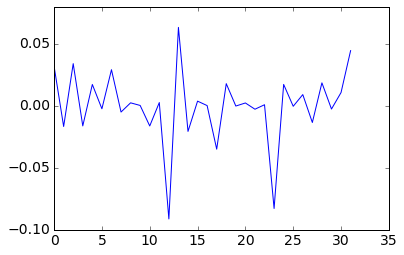

In [38]:
plt.plot(evecs_mle[2][lcc_sorted])
max_ind = np.where(evecs_mle[2]==max(evecs_mle[2]))[0]
print cc[max_ind]
min_ind = np.where(evecs_mle[2]==min(evecs_mle[2]))[0]
print cc[min_ind]
print cc_sorted[6]

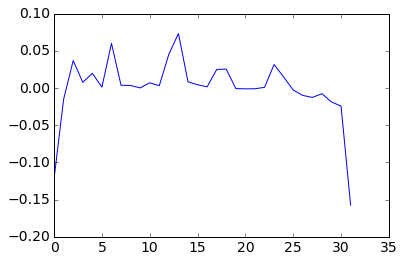

In [39]:
plt.plot(evecs_mle[3][lcc_sorted])

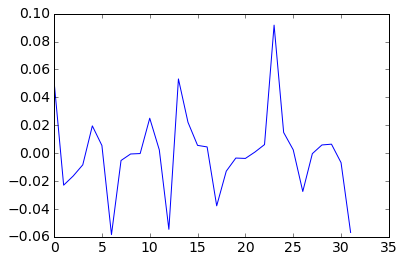

In [40]:
plt.plot(evecs_mle[4][lcc_sorted])

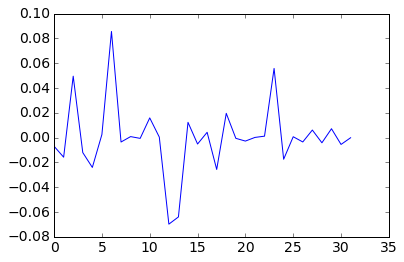

In [41]:
plt.plot(evecs_mle[5][lcc_sorted])

In [42]:
from copy import deepcopy
T_sorted = deepcopy(mle.transition_matrix)
for i in range(len(lcc_sorted)):
    for j in range(len(lcc_sorted)):
        T_sorted[i,j] = mle.transition_matrix[lcc_sorted[i],lcc_sorted[j]]

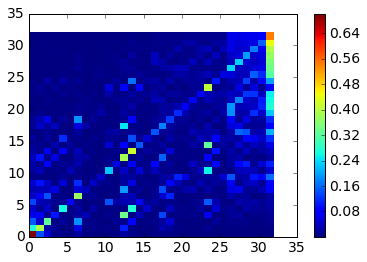

In [43]:
plt.pcolor(T_sorted)
plt.colorbar()

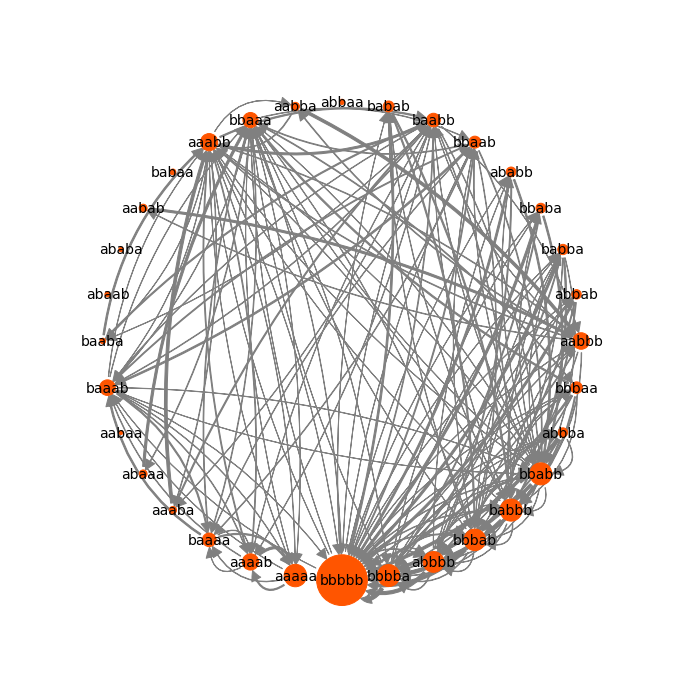

In [44]:
grids = np.linspace(-np.pi,np.pi,33)
x = sin(grids[1:])
y = cos(grids[1:])
circ = np.array(zip(x,y))
mplt.plot_markov_model(T_sorted, state_sizes=evecs_mle[0][lcc_sorted], pos=circ, state_labels=cc_labels[lcc_sorted], minflux=5e-4, arrow_labels=None, arrow_label_format='None')
gca().set_frame_on(False)

In [45]:
np.save('T_sorted_CG.npy',T_sorted)

In [46]:
#nstates = 12
#lags = [10,20,30,40,50]
#its = msm.timescales_hmsm(dtrajs_1D, nstates, lags=lags, errors=None, nsamples=250, n_jobs=-1)

In [47]:
#matplotlib.rcParams.update({'font.size': 14})
#mplt.plot_implied_timescales(its, ylog=False, units='steps', linewidth=2)
#xlim(0, 60); ylim(0, 1200);

In [48]:
# Now let's look at the equilibrium properties related to LR models

In [49]:
cc_full = cc_sorted
Nhel = 5
# 1. <Nc> = average alpha helical content
Nc_p_state = Nhel - np.sum(cc_full,axis=1)
# 2. <Nh> = average number of helical bonds
Nh_p_state = np.zeros(len(cc_full))
for ind,state in enumerate(cc_full):
    for quads in range(Nhel-3):
        if ( (state[quads]==0)and(state[quads+1]==0)and(state[quads+2]==0)and(state[quads+3]==0)):
            Nh_p_state[ind] += 1
# 3. <Ns> = average number of helical segments ("lone" alpha pairs)
Ns_p_state = np.zeros(len(cc_full))
for ind,state in enumerate(cc_full):
    for trips in range(Nhel-2):
        if ( (state[trips]==0)and(state[trips+1]==0)and(state[trips+2]==1) ):
            Ns_p_state[ind] += 1
# 4. <Nl> = average number of isolated residues in alpha state
Nl_p_state = np.zeros(len(cc_full))
for ind,state in enumerate(cc_full):
    for trips in range(Nhel-2):
        if ( (state[trips]==1)and(state[trips+1]==0)and(state[trips+2]==1) ):
            Nl_p_state[ind] += 1

In [50]:
Nc = np.sum(evecs_mle[0][lcc_sorted]*Nc_p_state)
Nh = np.sum(evecs_mle[0][lcc_sorted]*Nh_p_state)
Ns = np.sum(evecs_mle[0][lcc_sorted]*Ns_p_state)
Nl = np.sum(evecs_mle[0][lcc_sorted]*Nl_p_state)

In [51]:
print Nc
print Nh
print Ns
print Nl

1.54623786835
0.173659049445
0.198342219275
0.259618799577


In [52]:
# nb - AA values
Nc_AA = 1.55969343
Nh_AA = 0.11825029
Ns_AA = 0.17505783
Nl_AA = 0.38947465

In [53]:
dtrajs_1D

[array([0, 0, 0, ..., 8, 8, 2], dtype=int32),
 array([0, 0, 0, ..., 2, 2, 2], dtype=int32),
 array([25, 25, 25, ...,  2,  2,  2], dtype=int32),
 array([25, 25, 26, ...,  4,  4,  4], dtype=int32),
 array([15, 15, 15, ...,  0,  0,  0], dtype=int32),
 array([15, 15, 15, ..., 15,  3,  3], dtype=int32),
 array([30, 30, 30, ...,  5,  5,  5], dtype=int32),
 array([30, 24, 24, ...,  8,  8,  8], dtype=int32),
 array([22, 22, 21, ...,  5,  5,  5], dtype=int32),
 array([22, 22, 22, ...,  2,  2,  2], dtype=int32),
 array([18, 18, 18, ...,  2,  2,  2], dtype=int32),
 array([18, 18, 18, ...,  4,  4,  4], dtype=int32),
 array([23, 23, 23, ...,  2,  2,  2], dtype=int32),
 array([23, 23, 23, ..., 11, 11, 11], dtype=int32),
 array([23, 23, 23, ..., 11, 11, 11], dtype=int32),
 array([23, 21, 21, ..., 13, 30, 30], dtype=int32),
 array([21, 21, 21, ...,  2,  2,  2], dtype=int32),
 array([21, 21, 23, ..., 10, 10, 10], dtype=int32),
 array([23, 23, 23, ...,  2,  2,  2], dtype=int32),
 array([23, 23, 23, ...,

In [54]:
# try converting the trajectory
for traj in range(len(dtrajs_1D)):
    dtrajs_1D[traj] = lcc_sorted_map[dtrajs_1D[traj]].astype(int)

In [55]:
tau = 25
nts = n_clusters
Cmat = pyemma.msm.estimation.count_matrix(dtrajs_1D, tau, sliding=True, sparse_return=False)
lcc = pyemma.msm.estimation.largest_connected_set(Cmat, directed=True)
Cmat = pyemma.msm.estimation.largest_connected_submatrix(Cmat, directed=True, lcc=lcc)
Tmle = pyemma.msm.estimation.transition_matrix(Cmat, reversible=True)

In [56]:
mle = pyemma.msm.markov_model(Tmle)
evals_mle = mle.eigenvalues(k=n_clusters)
evecs_mle = mle.eigenvectors_left(k=n_clusters)

array([[ 0.,  1.,  0.,  0.,  1.]], dtype=float32)

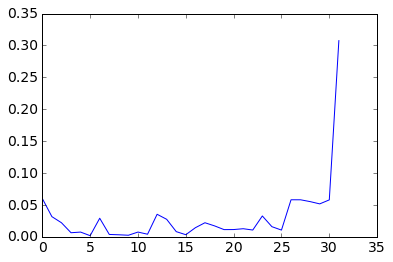

In [57]:
#plt.plot(evecs_mle[0])
plt.plot(evecs_mle[0])
max_ind = np.where(evecs_mle[0]==max(evecs_mle[0]))[0]
cc[max_ind]

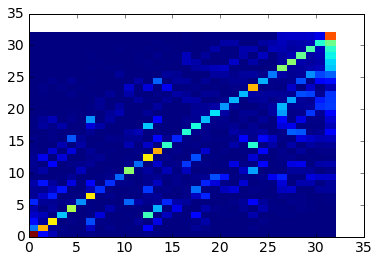

In [58]:
plt.pcolor(Tmle)

In [59]:
dtrajs_1D

[array([30, 30, 30, ..., 29, 29, 31]),
 array([30, 30, 30, ..., 31, 31, 31]),
 array([22, 22, 22, ..., 31, 31, 31]),
 array([22, 22, 15, ..., 28, 28, 28]),
 array([18, 18, 18, ..., 30, 30, 30]),
 array([18, 18, 18, ..., 18, 20, 20]),
 array([ 3,  3,  3, ..., 26, 26, 26]),
 array([ 3, 14, 14, ..., 29, 29, 29]),
 array([12, 12,  1, ..., 26, 26, 26]),
 array([12, 12, 12, ..., 31, 31, 31]),
 array([ 2,  2,  2, ..., 31, 31, 31]),
 array([ 2,  2,  2, ..., 28, 28, 28]),
 array([ 0,  0,  0, ..., 31, 31, 31]),
 array([ 0,  0,  0, ..., 23, 23, 23]),
 array([ 0,  0,  0, ..., 23, 23, 23]),
 array([0, 1, 1, ..., 7, 3, 3]),
 array([ 1,  1,  1, ..., 31, 31, 31]),
 array([ 1,  1,  0, ..., 25, 25, 25]),
 array([ 0,  0,  0, ..., 31, 31, 31]),
 array([ 0,  0,  0, ..., 28, 28, 28])]